# <center>Diabetic Retinopathy Detection </center>

## Importing libraries

In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import numpy as np
from PIL import Image
import cv2
import random,string

In [2]:
DIR = "Dataset"

In [3]:
info ={}
paths = os.listdir("Dataset")
for path in paths:
    l = DIR+"/"+path
    info[path] = len(glob.glob(l+"/*.png"))
print(info)

{'Mild': 370, 'Moderate': 999, 'No_DR': 1805, 'Proliferate_DR': 295, 'Severe': 193}


In [4]:
mild = glob.glob("Dataset/Mild/*.png")
moderate = glob.glob("Dataset/Moderate/*.png")
no_dr = glob.glob("Dataset/No_DR/*.png")
proliferate = glob.glob("Dataset/Proliferate_DR/*.png")
severe = glob.glob("Dataset/Severe/*.png")

In [5]:
keys = list(info.keys())
val = list(info.values())

## Visualizing data

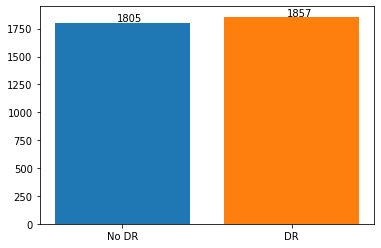

In [6]:
no_dr = info["No_DR"]
dr = info["Mild"]+info["Moderate"]+info["Proliferate_DR"]+info["Severe"]
plt.bar("No DR",no_dr)
plt.bar("DR",dr)
freq = [no_dr,dr]
for index, value in enumerate(freq):
    plt.text(index-0.03,value+8,str(value),color="black")
plt.show()

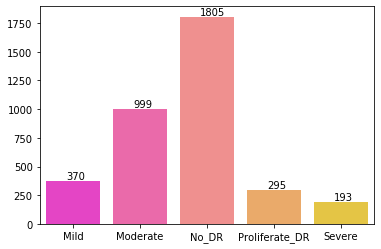

In [7]:
sns.barplot(keys,val,palette="spring")
for index, value in enumerate(val):
    plt.text(index-0.1,value+15,str(value),color="black")
plt.show()

## Data Preprocessing

In [44]:
def change_channel(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [45]:
from keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(rotation_range=180,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    vertical_flip=True, 
                                    horizontal_flip=True,
                                    zoom_range=0.2,
                                    shear_range=0.1,
                                    preprocessing_function=change_channel,
                                    fill_mode='nearest')

In [46]:
def generate(img,class_type,stop):
    i=0
    path = "Dataset/"+class_type
    for batch in data_generator.flow(img,batch_size=1, save_to_dir=path,save_prefix='temp',save_format='png'):
        i+=1
        if(i>=stop):
            break

In [53]:
# Preprocessing mild images
for path in mild:
    img = cv2.imread(path)
    img = img.reshape((1,)+img.shape)
    generate(img,'Mild',1)

In [54]:
# Preprocessing Proliferate images
for path in proliferate:
    img = cv2.imread(path)
    img = img.reshape((1,)+img.shape)
    generate(img,'Proliferate_DR',2)   

In [55]:
# Preprocessing Severe images
for path in severe:
    img = cv2.imread(path)
    img = img.reshape((1,)+img.shape)
    generate(img,'Severe',3) 

## After Preprocessing

In [56]:
info ={}
paths = os.listdir("Dataset")
for path in paths:
    l = DIR+"/"+path
    info[path] = len(glob.glob(l+"/*.png"))
print(info)

{'Mild': 736, 'Moderate': 999, 'No_DR': 1805, 'Proliferate_DR': 870, 'Severe': 746}


In [57]:
keys = list(info.keys())
val = list(info.values())

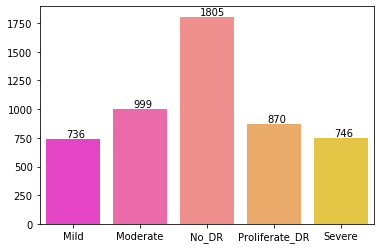

In [58]:
sns.barplot(keys,val,palette="spring")
for index, value in enumerate(val):
    plt.text(index-0.1,value+15,str(value),color="black")
plt.show()

<hr>